in this Google Colab environment we develop the Roberta  model. with 1000 observations.

In [4]:
import pandas as pd

In [5]:
path='/content/drive/MyDrive/mydf.csv'
mydf=pd.read_csv(path)
mydf  #load the data set into Google Colab and to pandas data frame

,overall,verified,reviewerID,reviewText,summary,Sentiment of Star Ratings
0,2.0,False,AWIYG7HFJJEIB,nut Malo es very cheap,Two Stars,Negative
1,1.0,True,A8Q2DT85Q8CAN,It seems the sizing of this is way off. I rea...,Entirely too small!,Negative
2,1.0,True,ANAE9TUXKTR6X,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...,Negative
3,2.0,True,A2JK19L9NH65JB,I thought I got the right size but apparently ...,I thought I got the right size but apparently ...,Negative
4,5.0,True,A29VT82OW77PZ7,I love this wallet,Five Stars,Positive
...,...,...,...,...,...,...
993,4.0,True,A2Y1HX10GBWEU7,I typically wear a S/M in shirts. I ordered WA...,"The shirt looks good, but it would has been cr...",Positive
994,5.0,True,A243PV4BRZZRPL,Works well,Five Stars,Positive
995,3.0,True,A17X78X4X7MI76,Extremely Large!,Three Stars,Neutral
996,4.0,True,A1SFIF384CBRBA,Very cute very warm and very comfortable I lov...,would recommend,Positive


In [6]:
import pandas as pd  #dowload the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [7]:
example = mydf['reviewText'][50]  #here we explore some data in the frame
print(example)

Amazing, photos to come!


In [ ]:
import nltk #we explore some tokenization techniques here "punkt"
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tokens = nltk.word_tokenize(example) #we here explore how the tokenizer work this function seperate words into different chuncks.
tokens[:10]

['Amazing', ',', 'photos', 'to', 'come', '!']

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged = nltk.pos_tag(tokens) #the output showw how the nltk word tokenizer work nnp, nn,vb etc... are tokens for different words
tagged[:10]

[('Amazing', 'NNP'),
 (',', ','),
 ('photos', 'NN'),
 ('to', 'TO'),
 ('come', 'VB'),
 ('!', '.')]

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer #exporting the sentiment analysis library in nltk
from tqdm.notebook import tqdm #tqdm provides a better performance for loops in python

sia = SentimentIntensityAnalyzer() #creating a variable sia and assign it a sentiment intensity analyser object

In [ ]:
sia.polarity_scores('I am so happy!') #the results shows as follow

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6239}

### **ROBERTA**

In [ ]:
pip install transformers #from here after RoBERTa model will be implemnted.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification #we use the transformer based tokenizers in input data
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment" #importing the pre trained RoBERTa model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:

encoded_text = tokenizer(example, return_tensors='pt') #encoding the example text
output = model(**encoded_text) #encoded text pass to the model we interpret
scores = output[0][0].detach().numpy()  #extracting scores
scores = softmax(scores)
scores_dict = {     #creating a dictionery and load the model output in to a dictionery
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict) #output for the example generated by RoBERTa

{'roberta_neg': 0.0018945481, 'roberta_neu': 0.036957495, 'roberta_pos': 0.96114796}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)  #convert the scores into probability distribution
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:

mydf['ID'] = mydf.index


In [ ]:
mydf

,overall,verified,reviewerID,reviewText,summary,Sentiment of Star Ratings,ID
0,2.0,False,AWIYG7HFJJEIB,nut Malo es very cheap,Two Stars,Negative,0
1,1.0,True,A8Q2DT85Q8CAN,It seems the sizing of this is way off. I rea...,Entirely too small!,Negative,1
2,1.0,True,ANAE9TUXKTR6X,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...,Negative,2
3,2.0,True,A2JK19L9NH65JB,I thought I got the right size but apparently ...,I thought I got the right size but apparently ...,Negative,3
4,5.0,True,A29VT82OW77PZ7,I love this wallet,Five Stars,Positive,4
...,...,...,...,...,...,...,...
993,4.0,True,A2Y1HX10GBWEU7,I typically wear a S/M in shirts. I ordered WA...,"The shirt looks good, but it would has been cr...",Positive,993
994,5.0,True,A243PV4BRZZRPL,Works well,Five Stars,Positive,994
995,3.0,True,A17X78X4X7MI76,Extremely Large!,Three Stars,Neutral,995
996,4.0,True,A1SFIF384CBRBA,Very cute very warm and very comfortable I lov...,would recommend,Positive,996


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_df, test_df = train_test_split(mydf, test_size=0.2, random_state=42)

In [ ]:
test_df

,overall,verified,reviewerID,reviewText,summary,Sentiment of Star Ratings,ID
453,4.0,True,A6JI4C8MHTOOV,A gift for my Grand daughter.,Four Stars,Positive,453
792,5.0,True,A3237ZA8A3LAE6,I really like is very cute when I used the who...,Five Stars,Positive,792
209,5.0,True,AAVARJ4GEWTFJ,My mom loves oversized glasses. These are OVE...,Five Stars,Positive,209
309,5.0,True,A3VIVSN4ZLG063,"Love this. Great fit, looked great and so soph...",Five Stars,Positive,309
739,5.0,True,A3R3Y43T1ZQ24N,I puchased this item for my SN son and I accid...,which is amazing. I cannot attest to any BM is...,Positive,739
...,...,...,...,...,...,...,...
78,5.0,True,A7O59BIR429NV,I am so pleased with my recent purchase of my ...,I am a happy customer,Positive,78
29,5.0,True,A371E0L0B0YJGM,Bought for a friends baby shower. She loves t...,Too cute!,Positive,29
277,5.0,True,A344AA8V3OIG9K,Very very cute on me! If you're upset about sh...,Great suit,Positive,277
261,5.0,True,A2ECHAF2BX4TPM,Very high quality for the price! Beautiful co...,Great purchase!,Positive,261


In [ ]:
res = {} #here we train the model
for i, row in tqdm(test_df.iterrows(), total=len(test_df)):
    try:
        text = row['reviewText']
        myid = row['ID']

        roberta_result = polarity_scores_roberta(text)
        both = {**roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T #the results of the model is as follows
#results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df['Highest'] = results_df[['roberta_neg', 'roberta_neu', 'roberta_pos']].idxmax(axis=1)
results_df


,roberta_neg,roberta_neu,roberta_pos,Highest
453,0.002655,0.167332,0.830013,roberta_pos
792,0.001714,0.018971,0.979315,roberta_pos
209,0.001249,0.006553,0.992199,roberta_pos
309,0.001872,0.009462,0.988666,roberta_pos
739,0.016012,0.092448,0.891541,roberta_pos
...,...,...,...,...
78,0.002881,0.024507,0.972612,roberta_pos
29,0.001225,0.013488,0.985287,roberta_pos
277,0.083532,0.138719,0.777749,roberta_pos
261,0.001357,0.006714,0.991929,roberta_pos


In [ ]:
results_df.isna().sum()

roberta_neg    0
roberta_neu    0
roberta_pos    0
Highest        0
dtype: int64

In [ ]:
results_df['Sentiment of Predicted Ratings'] = results_df['Highest'].apply(
    lambda x: 'Neutral' if x == 'roberta_neu' else ('Negative' if x == 'roberta_neg' else 'Positive')
)
results_df #get a new data frame with the sentiment scores

,roberta_neg,roberta_neu,roberta_pos,Highest,Sentiment of Predicted Ratings
453,0.002655,0.167332,0.830013,roberta_pos,Positive
792,0.001714,0.018971,0.979315,roberta_pos,Positive
209,0.001249,0.006553,0.992199,roberta_pos,Positive
309,0.001872,0.009462,0.988666,roberta_pos,Positive
739,0.016012,0.092448,0.891541,roberta_pos,Positive
...,...,...,...,...,...
78,0.002881,0.024507,0.972612,roberta_pos,Positive
29,0.001225,0.013488,0.985287,roberta_pos,Positive
277,0.083532,0.138719,0.777749,roberta_pos,Positive
261,0.001357,0.006714,0.991929,roberta_pos,Positive


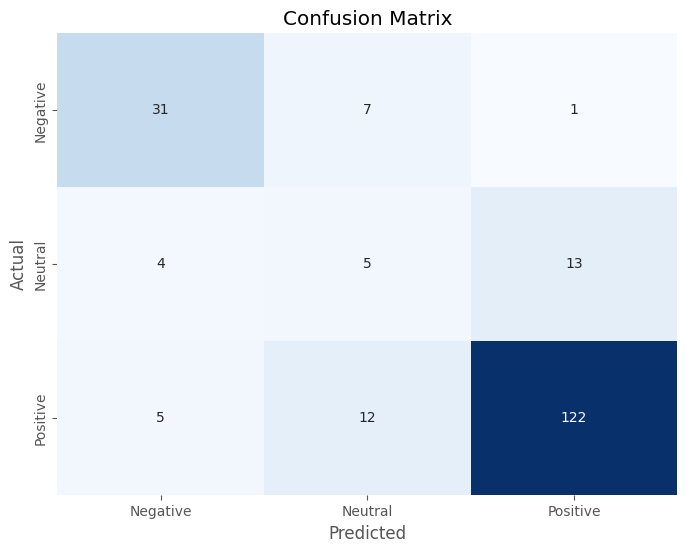

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Define a mapping from string labels to numerical labels
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}

# Convert the actual and predicted labels to numerical values
y_true = np.array([label_mapping[label] for label in test_df['Sentiment of Star Ratings']])
y_pred = np.array([label_mapping[label] for label in results_df['Sentiment of Predicted Ratings']])

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap to visualize the confusion matrix
classes = list(label_mapping.keys())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming 'actual_sentiment' contains the actual sentiment labels ("Positive", "Neutral", "Negative")
# and 'predicted_sentiment' contains the predicted sentiment labels by your BERT model
actual_sentiment = test_df['Sentiment of Star Ratings']
predicted_sentiment = results_df['Sentiment of Predicted Ratings']

# Generate a classification report
report = classification_report(actual_sentiment, predicted_sentiment, target_names=["Positive", "Neutral", "Negative"])

print(report)


              precision    recall  f1-score   support

    Positive       0.78      0.79      0.78        39
     Neutral       0.21      0.23      0.22        22
    Negative       0.90      0.88      0.89       139

    accuracy                           0.79       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.80      0.79      0.79       200

